In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\test
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

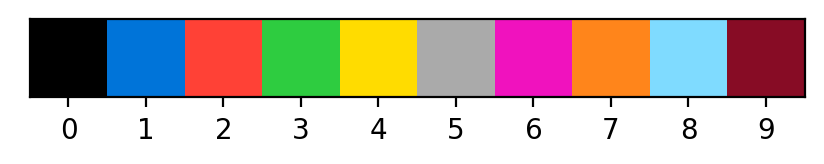

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [31]:
def color_decrease(a,b):
    list1=[]
    a1=np.bincount(np.array(a).flatten(),minlength=10)
    b1=np.bincount(np.array(b).flatten(),minlength=10)
    for i in range(10):
        if b1[i]<a1[i] :
            list1.append(i)
    return list1

In [35]:
a=Evals[249]["train"][0]["input"]
b=Evals[249]["train"][0]["output"]
color_decrease(a,b)

[0]

In [110]:
def Solve_recolor0(basic_task): 

    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    color_decrease0=[]
    for bg in range(10):
        solved=True
        for x, y in zip(Input,Output):
            x_copy=Defensive_Copy(x)
            x_array=np.array(x)

            if len(x)!=len(y) or len(x[0])!=len(y[0]):
                return -1
            if len(color_decrease(x,y))==0 or (color_decrease(x,y)!=color_decrease0 and len(color_decrease0)!=0):
                return -1
            else:
                color_decrease0=color_decrease(x,y)
            for c in color_decrease(x,y):
                for i in range(len(x)):
                    for j in range(len(x[0])):
                        if x[i][j]==c:
                            for color in range(10):
                                if color in x_array[i,:] and color in x_array[:,j] and color not in color_decrease0 and color!=bg:
                                    x_copy[i][j]=color

                if x_copy!=y:
                    solved=False
                    break
        Test_Case_array=np.array(Test_Case)
        Test_Case_copy=Defensive_Copy(Test_Case)
        if solved==True:
            for c in color_decrease0:

                for i in range(len(Test_Case)):
                    for j in range(len(Test_Case[0])):
                        if Test_Case[i][j]==c:
                            for color in range(10):
                                if color in Test_Case_array[i,:] and color in Test_Case_array[:,j] and color not in color_decrease0 and color!=bg:
                                    Test_Case_copy[i][j]=color

            return Test_Case_copy
    return -1

249 0


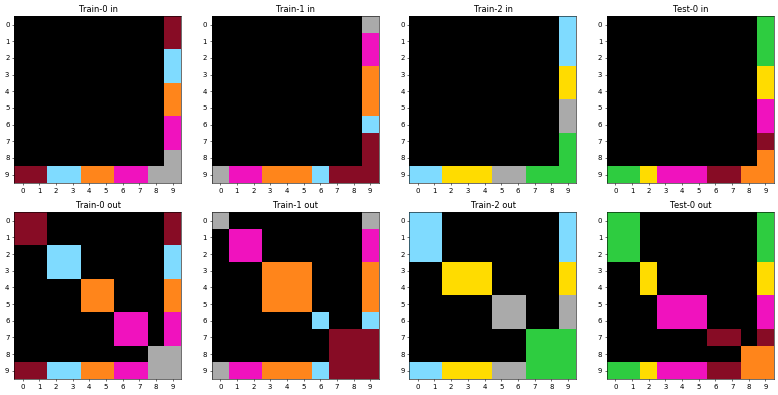

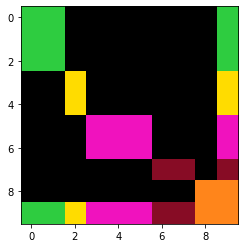

308 0


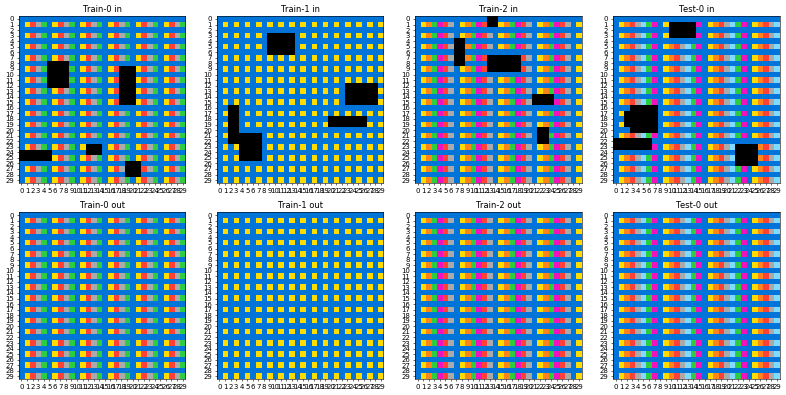

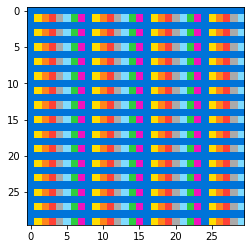

In [111]:
for i in range(400):

    task = Evals[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        a = Solve_recolor0(basic_task)
        if a != -1 :
            print(i,j)
            plot_task(task)
            plot_picture(a)

In [103]:
def Solve_recolor1(basic_task): 

    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    color_decrease0=[]
    for bg in range (10):
        solved=True
        for x, y in zip(Input,Output):
            x_copy=Defensive_Copy(x)
            x_array=np.array(x)

            if len(x)!=len(y) or len(x[0])!=len(y[0]):
                return -1

            if len(color_decrease(x,y))==0 or (color_decrease(x,y)!=color_decrease0 and len(color_decrease0)!=0):
                return -1
            else:
                color_decrease0=color_decrease(x,y)

            for c in color_decrease(x,y):
                for i in range(len(x)):
                    for j in range(len(x[0])):
                        if x[i][j]==c:
                            for color in range(10):
                                if (color in x_array[i,:] or color in x_array[:,j]) and color not in color_decrease0 and color!=bg:
                                    x_copy[i][j]=color


                if x_copy!=y:
                    solved=False
                    break

        Test_Case_array=np.array(Test_Case)
        Test_Case_copy=Defensive_Copy(Test_Case)
        
        
        if solved==True:
            for c in color_decrease0 :

                for i in range(len(Test_Case)):
                    for j in range(len(Test_Case[0])):
                        if Test_Case[i][j]==c:
                            for color in range(10):
                                if (color in Test_Case_array[i,:] or color in Test_Case_array[:,j]) and color not in color_decrease0 and color!=bg:
                                    Test_Case_copy[i][j]=color

            return Test_Case_copy
    return -1

118 0


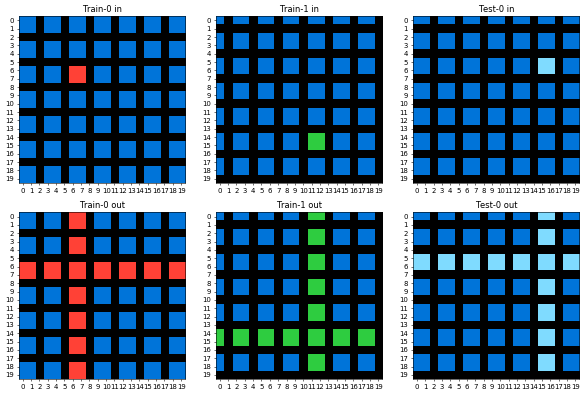

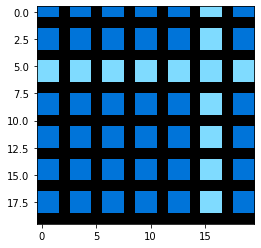

302 0


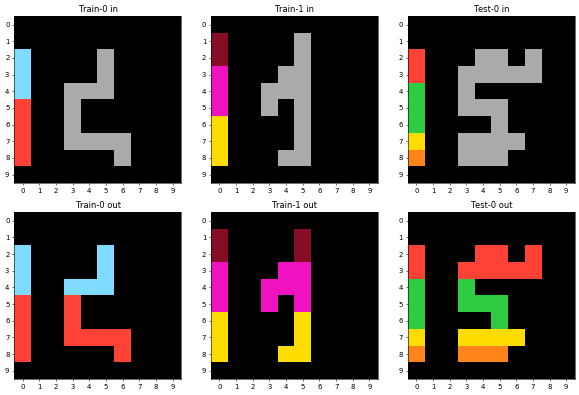

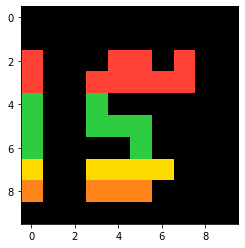

In [104]:
for i in range(400):

    task = Evals[i]
    k = len(task['test'])
    for j in range(k):
        basic_task = Create(task, j)
        a = Solve_recolor1(basic_task)
        if a != -1 :
            print(i,j)
            plot_task(task)
            plot_picture(a)

In [86]:
Evals[311]["train"][0]["input"]

[[2, 0, 2], [0, 2, 0], [2, 2, 2]]